# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing dataset, which contains housing values in the suburbs of Boston. The Boston housing data is commonly used by aspiring Data Scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `'train.csv'`) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create two new DataFrames based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't 
    - Create two new DataFrames based on a certain split for crime rate 
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This DataFrame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [94]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

# Loading the data (which is stored in the file 'train.csv')

train = pd.read_csv('train.csv')
train.head()



,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<IPython.core.display.Javascript object>


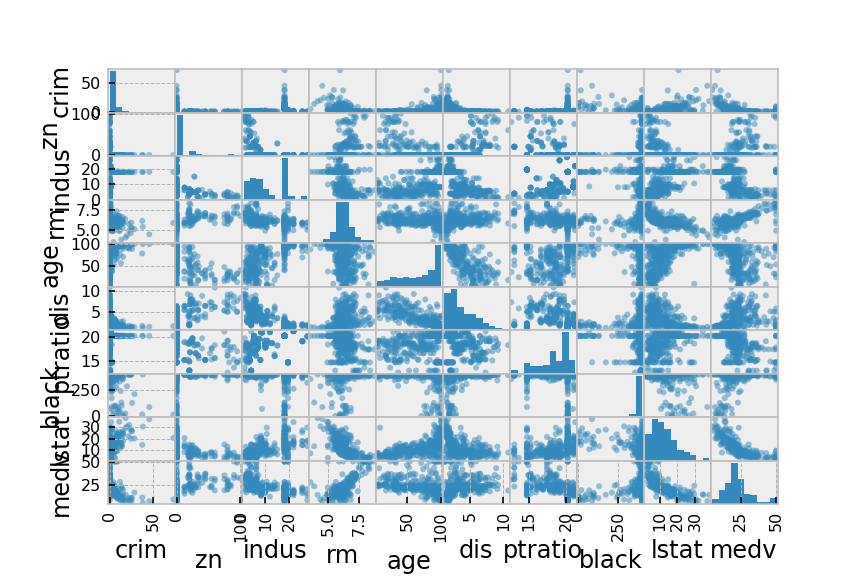

In [95]:
plt.style.use('bmh')
pd.plotting.scatter_matrix(train[['crim','zn','indus','rm','age','dis','ptratio','black','lstat','medv']]);

In [96]:
# Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables

vars_of_interest = ['crim','indus','black','age','lstat','medv']
train[vars_of_interest].describe()


,crim,indus,black,age,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,11.293483,359.466096,68.226426,12.515435,22.768769
std,7.352272,6.998123,86.584567,28.133344,7.067781,9.173468
min,0.006320,0.740000,3.500000,6.000000,1.730000,5.000000
25%,0.078960,5.130000,376.730000,45.400000,7.180000,17.400000
50%,0.261690,9.900000,392.050000,76.700000,10.970000,21.600000
75%,3.678220,18.100000,396.240000,93.800000,16.420000,25.000000
max,73.534100,27.740000,396.900000,100.000000,37.970000,50.000000


In [97]:
# Create meaningful subsets of the data using selection operations like .loc, .iloc, or related operations.

# Examples of potential splits:
#   # Create two new DataFrames based on your existing data, 
#     where one contains all the properties next to the Charles river, 
#     and the other one contains properties that aren't

near_chas = train.loc[train['chas']==1]
print("Near Charles:\n",near_chas[vars_of_interest].describe())
away_chas = train.loc[train['chas']==0]
print("\nAway from Charles:\n",away_chas[vars_of_interest].describe())
print("\ndiff:\n",near_chas[vars_of_interest].describe() 
                  - away_chas[vars_of_interest].describe())


Near Charles:
             crim      indus       black         age      lstat       medv
count  20.000000  20.000000   20.000000   20.000000  20.000000  20.000000
mean    2.163972  12.330000  380.681000   75.815000  11.118000  30.175000
std     2.885734   6.505255   21.661541   22.808638   7.198281  12.362204
min     0.015010   1.210000  321.020000   24.800000   2.960000  13.400000
25%     0.200377   6.200000  377.565000   58.325000   5.007500  21.700000
50%     0.572070  12.240000  390.580000   86.000000   9.735000  26.050000
75%     3.453213  18.100000  395.240000   92.925000  14.775000  37.900000
max     8.982960  19.580000  396.900000  100.000000  26.820000  50.000000

Away from Charles:
              crim       indus       black         age       lstat        medv
count  313.000000  313.000000  313.000000  313.000000  313.000000  313.000000
mean     3.436787   11.227252  358.110511   67.741534   12.604728   22.295527
std      7.544289    7.032974   88.984202   28.400933    7.06166

_Explain why you used the chosen subsets and do this for three possible 2-way splits._

_State how you think the two measures of centrality and/or dispersion might be different for each subset of the data._

There are only 20 neighborhoods near the Charles, while there are 313 away from the Charles.

Near the Charles the mean crime rate is lower, mean housing value is higher, and black population higher than away from the Charles.

The standard deviation in crime rate and black population is much lower near the Charles.

The median crime rate is higher near the Charles than away from the Charles (there is at least one high-crime outlier). The median black population is almost the same (there is at least one outlier away from the Charles with extremely low black population). Median housing value is higher near the Charles, and the median home age is 9.5 years greater.

While there is little difference in the mean lower-status population in the two subsets, the median lower-status  population is higher away from the Charles.

<IPython.core.display.Javascript object>


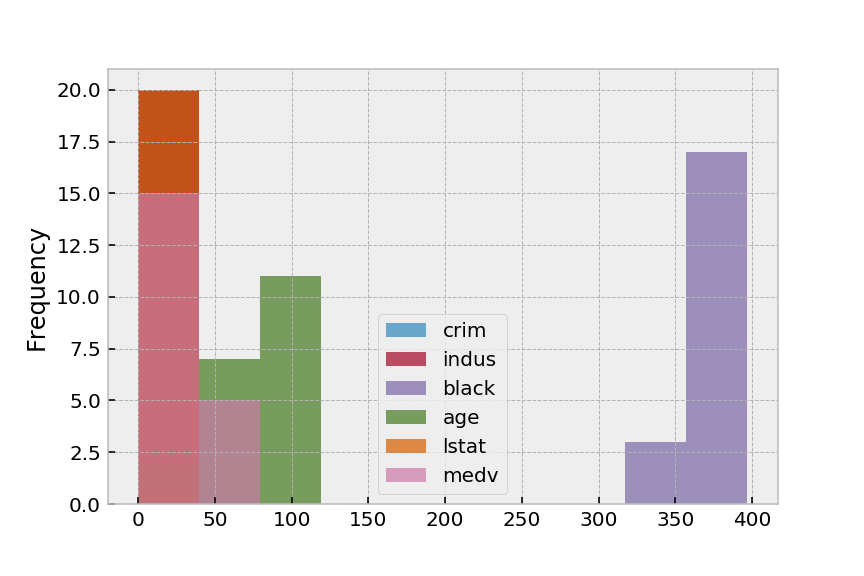

<IPython.core.display.Javascript object>


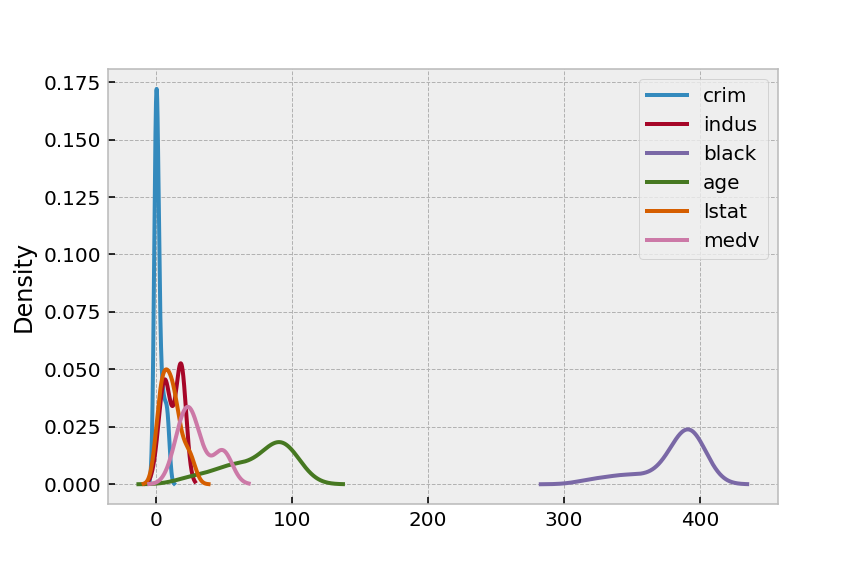

<IPython.core.display.Javascript object>


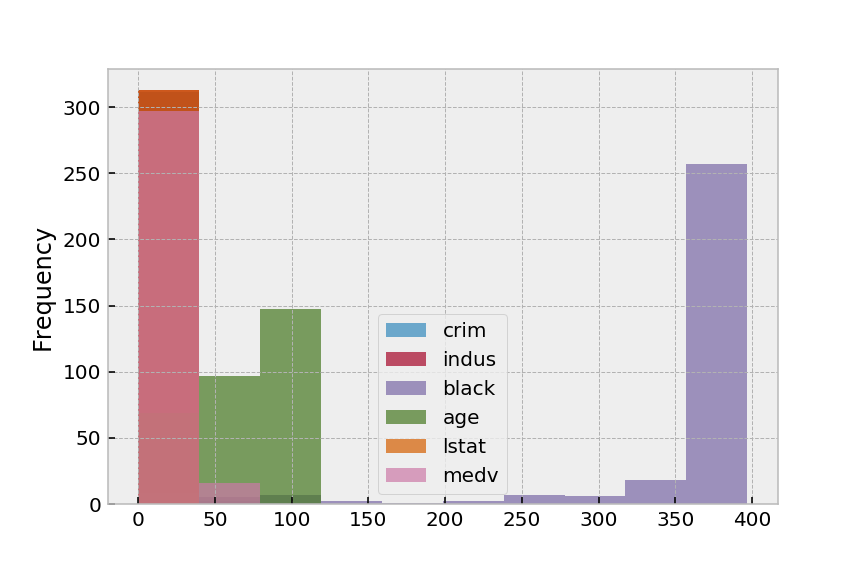

<IPython.core.display.Javascript object>


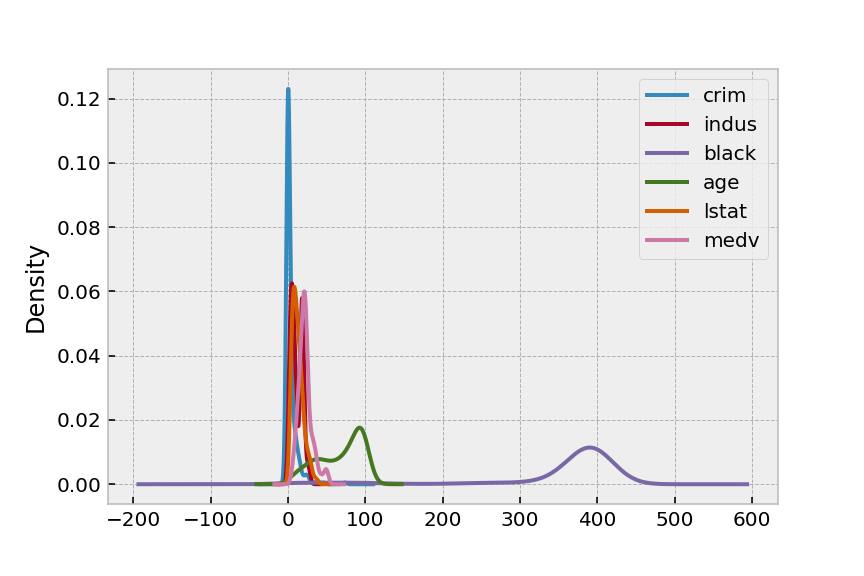

In [99]:
# Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. 
# Make sure to use subplots so it is easy to compare the relationships.


near_chas_plot = near_chas[vars_of_interest].plot.hist(alpha=0.7)
near_chas[vars_of_interest].plot.kde()
away_chas_plot = away_chas[vars_of_interest].plot.hist(alpha=0.7)
away_chas[vars_of_interest].plot.kde()

# 

<IPython.core.display.Javascript object>


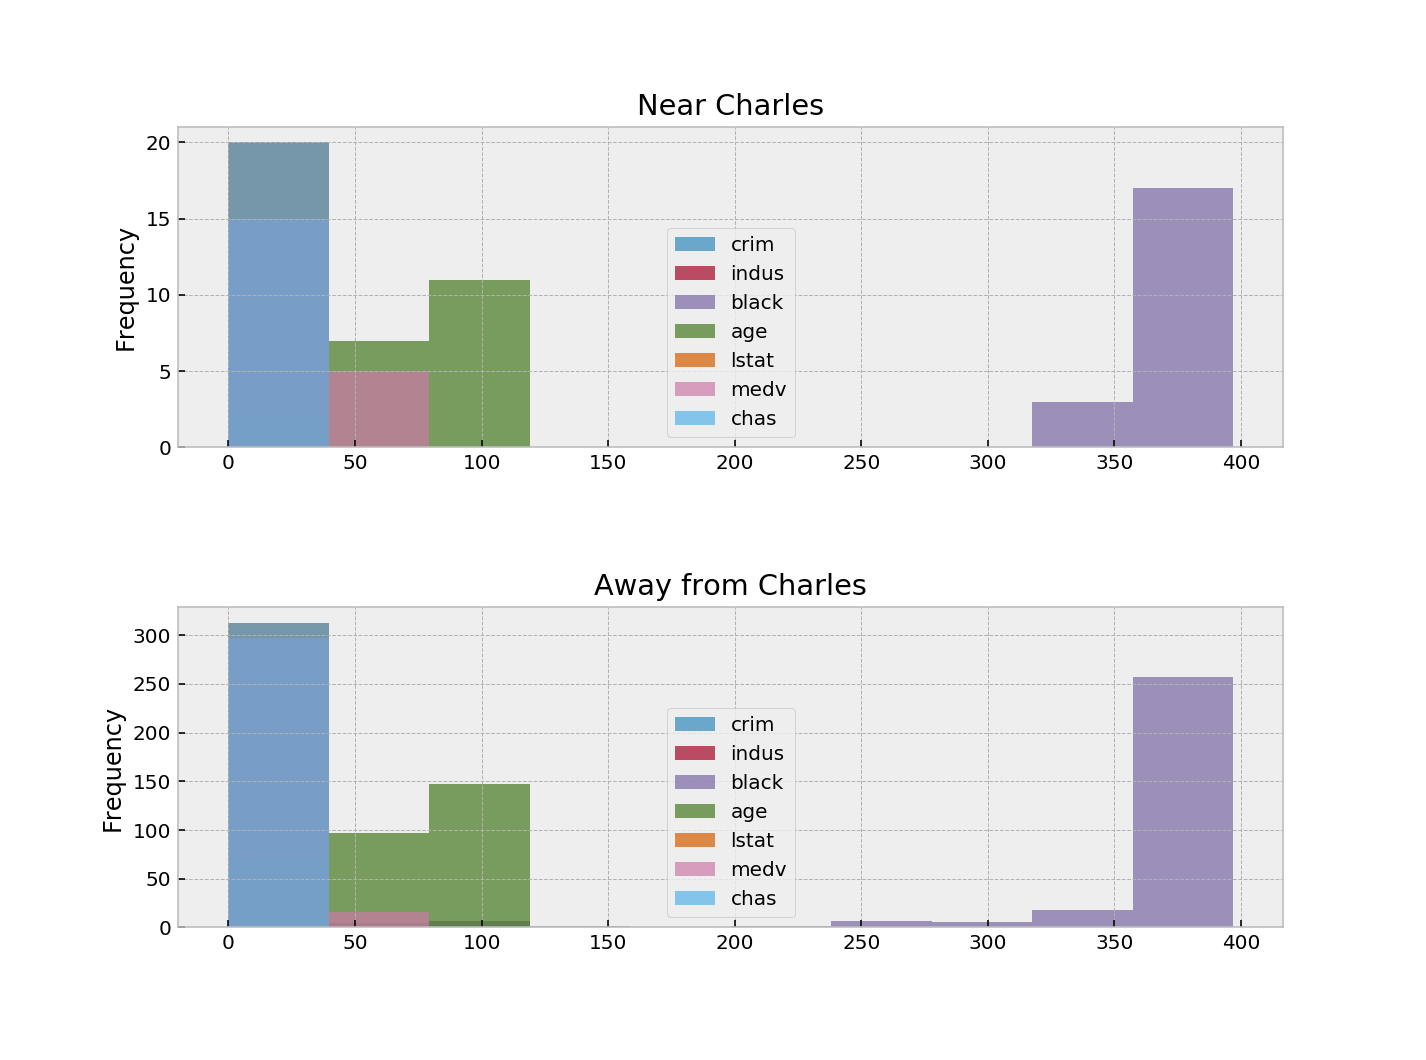

In [93]:
fig, (ax1, ax2) = plt.subplots(2, 1)
near_chas[vars_of_interest].plot.hist(alpha=0.7,ax=ax1)
away_chas[vars_of_interest].plot.hist(alpha=0.7,ax=ax2)
ax1.set_title("Near Charles")
ax2.set_title("Away from Charles")
fig.subplots_adjust(hspace=0.5)

In [87]:
# plotting normalized

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler() 
# near_chas_scaled = near_chas.copy()
# scaled_values = scaler.fit_transform(near_chas_scaled) 
# near_chas_scaled.loc[:,:] = scaled_values
# near_chas_scaled[vars_of_interest].plot.kde()

In [100]:
# Create two new DataFrames based on a certain split for crime rate

low_crime = train.loc[train.crim < train.crim.median()]
print("Low crime:\n",low_crime[vars_of_interest].describe())
high_crime = train.loc[train.crim >= train.crim.median()]
print("\nHigh crime:\n",high_crime[vars_of_interest].describe())
print("\ndiff:\n",low_crime[vars_of_interest].describe() 
                  - high_crime[vars_of_interest].describe())

Low crime:
              crim       indus       black         age       lstat        medv
count  166.000000  166.000000  166.000000  166.000000  166.000000  166.000000
mean     0.094975    7.251627  388.706867   51.144578    9.279518   24.904217
std      0.064579    5.981559   27.016500   25.806134    4.526629    7.171571
min      0.006320    0.740000   70.800000    6.000000    1.980000    8.100000
25%      0.044783    3.380000  390.445000   31.600000    5.780000   20.300000
50%      0.078855    5.255000  394.045000   48.550000    8.595000   23.350000
75%      0.140010    9.407500  396.900000   72.350000   11.852500   28.075000
max      0.259150   27.740000  396.900000   98.800000   29.680000   50.000000

High crime:
              crim       indus       black         age       lstat        medv
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000
mean     6.606155   15.311138  330.400419   85.205988   15.731976   20.646108
std      9.319135    5.459720  112.086

_State how you think the two measures of centrality and/or dispersion might be different for each subset of the data._

Looking at the difference between low-crime (below the median) and high-crime (above the median) neighborhoods, we see that level of industry and in lower-status population is correlated with high crime, while median housing value is correlated with low crime.

There is a drastic difference in the age of housing in low-crime vs. high-crime towns: the mean age is 34 years less and the median age 43 years less.

The standard deviation in crime level and black population is much higher in the high-crime population.

In [101]:
# Looking at same info if we only look at 25th percentile versus 75th percentile of crime rate:

lowest_crime = train.loc[train.crim < train.crim.quantile(.25)]
print("Lowest crime:\n",lowest_crime[vars_of_interest].describe())
highest_crime = train.loc[train.crim >= train.crim.quantile(.75)]
print("\nHighest crime:\n",highest_crime[vars_of_interest].describe())
print("\ndiff:\n",lowest_crime[vars_of_interest].describe() 
                  - highest_crime[vars_of_interest].describe())

Lowest crime:
             crim      indus       black        age      lstat       medv
count  83.000000  83.000000   83.000000  83.000000  83.000000  83.000000
mean    0.042755   4.916024  392.144699  45.803614   7.201084  27.321687
std     0.019059   4.604561    8.736106  19.696109   2.794330   7.866679
min     0.006320   0.740000  341.600000   9.900000   1.980000  11.900000
25%     0.028190   2.385000  392.085000  31.300000   5.035000  22.000000
50%     0.044620   3.440000  394.720000  45.100000   6.930000  24.500000
75%     0.056975   5.190000  396.900000  59.000000   9.005000  31.800000
max     0.078750  25.650000  396.900000  91.000000  14.800000  50.000000

Highest crime:
             crim         indus       black         age      lstat       medv
count  84.000000  8.400000e+01   84.000000   84.000000  84.000000  84.000000
mean   12.027551  1.810000e+01  297.187976   90.807143  18.610714  16.851190
std    10.634535  7.148103e-15  141.369261   10.392198   6.984341   9.094517
min

_State how you think the two measures of centrality and/or dispersion might be different for each subset of the data._

Looking at the difference between low-crime (25th percentile) and high-crime (above 75th percentile) neighborhoods, we see the differences in our previous sample intensified: that level of industry and in lower-status population is correlated with high crime, while median housing value is correlated with low crime.

There is a drastic difference in the age of housing in lowest-crime vs. highest-crime towns: the mean age is 45 years less and the median age 50 years less.

The standard deviation in crime level and black population is much higher in the highest-crime population.

In [102]:
# looking at low-black population vs. high-black
lowest_black = train.loc[train['black']<train['black'].quantile(.25)]
print("Lowest-black population:\n",lowest_black[vars_of_interest].describe())
highest_black = train.loc[train['black']<train['black'].quantile(.75)]
print("Highest-black population:\n",highest_black[vars_of_interest].describe())
print("\ndiff:\n",lowest_black[vars_of_interest].describe() 
                  - highest_black[vars_of_interest].describe())

Lowest-black population:
             crim      indus       black         age      lstat       medv
count  83.000000  83.000000   83.000000   83.000000  83.000000  83.000000
mean    7.207934  16.024217  260.126145   82.975904  16.440120  19.350602
std    11.099536   5.660489  130.221227   22.630347   7.459466   9.712920
min     0.014390   1.520000    3.500000    7.800000   1.730000   7.000000
25%     1.169115  18.100000  129.390000   78.400000  11.505000  13.550000
50%     2.924000  18.100000  331.290000   93.300000  16.140000  17.400000
75%     9.012210  18.840000  361.610000   97.300000  21.485000  22.700000
max    73.534100  27.740000  376.700000  100.000000  36.980000  50.000000
Highest-black population:
              crim       indus       black         age       lstat        medv
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean     3.206056   11.420884  346.849558   68.808434   12.296466   23.483936
std      7.364356    7.146122   96.966908   28.

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular dataset!